In [1]:
%store -r word_df

import pickle
import pandas as pd
import numpy as np

# pickle.dump(word_df, fileObject)
# b = pickle.load(fileObject)

print(word_df.shape)
print(word_df.head())



(989, 7)
  search_word                                        description  \
0     Siemens  15 Things You Didn't Know About SIEMENS | SUBS...   
1     Siemens  From digitalisation to automation, weƒ??re cha...   
2     Siemens  Are you interested in what Siemens does and wh...   
3     Siemens  The most powerful HVDC transformer in the worl...   
4     Siemens  Articolul complet pe site: https://cavaleria.r...   

                               localized.description  \
0  15 Things You Didn't Know About SIEMENS | SUBS...   
1  From digitalisation to automation, weƒ??re cha...   
2  Are you interested in what Siemens does and wh...   
3  The most powerful HVDC transformer in the worl...   
4  Articolul complet pe site: https://cavaleria.r...   

                                     localized.title  \
0            15 Things You Didn't Know About SIEMENS   
1                What is it like to work at Siemens?   
2                  Siemens - More than just business   
3  Siemens presents: 

In [2]:
# #Check to see if these two columns are the same
print(word_df['localized.title'].equals(word_df['title']))
print(word_df['localized.description'].equals(word_df['description']))
print(np.count_nonzero(word_df['localized.description']==(word_df['description'])))

True
False
974


In [3]:
# Almost all descriptions are the same, so go ahead and drop one of the columns
word_df = word_df.drop(columns=['localized.title'])
word_df = word_df.drop(columns=['localized.description'])

In [4]:
sample = word_df[['description','tags','title']]


In [5]:
word_df.groupby('search_word').describe()

target                                               
                count      mean       std  min   25%  50%   75%  max
search_word                                                         
Siemens          50.0  0.100000  0.416497  0.0  0.00  0.0  0.00  2.0
cats             50.0  1.900000  1.865366  0.0  0.00  1.5  3.75  5.0
christmas        50.0  1.820000  1.534501  0.0  0.00  2.0  3.00  5.0
donald trump     50.0  1.200000  1.069045  0.0  0.00  1.0  2.00  4.0
dude perfect     50.0  2.940000  2.410944  0.0  0.00  5.0  5.00  5.0
gaming           50.0  2.260000  1.337222  0.0  2.00  2.0  3.75  4.0
golf             50.0  0.920000  0.944155  0.0  0.00  1.0  1.00  4.0
horror           50.0  1.960000  1.524762  0.0  1.00  2.0  3.00  5.0
iphone           50.0  1.860000  1.428714  0.0  1.00  1.0  3.00  5.0
laugh            50.0  1.880000  1.437685  0.0  1.00  2.0  3.00  5.0
mac              50.0  1.220000  1.568699  0.0  0.00  1.0  2.00  5.0
mars             50.0  1.560000  1.145711  0.0  1.00  2.0  2.00  4.0
minecraft        50.0  2.160000  1.184250  0.0  1.25  2.0  3.00  4.0
movies           50.0  2.800000  1.818275  0.0  1.25  3.0  4.00  5.0
music            40.0  2.275000  2.112084  0.0  0.00  2.5  4.25  5.0
python           50.0  1.400000  1.538619  0.0  0.00  1.0  2.00  5.0
speedrun         50.0  1.160000  1.330337  0.0  0.00  1.0  2.00  4.0
sports           49.0  1.653061  1.422308  0.0  0.00  2.0  2.00  5.0
vacation         50.0  1.000000  1.442786  0.0  0.00  0.0  2.00  5.0
video blogging   50.0  0.200000  0.606092  0.0  0.00  0.0  0.00  3.0

In [6]:
word_df.head(5)

,search_word,description,tags,title,target
0,Siemens,15 Things You Didn't Know About SIEMENS | SUBS...,"['Alux', 'Alux.com', 'Alux Youtube', 'luxury l...",15 Things You Didn't Know About SIEMENS,0
1,Siemens,"From digitalisation to automation, weƒ??re cha...","['Siemens', 'Siemens UK', 'careers', 'jobs', '...",What is it like to work at Siemens?,0
2,Siemens,Are you interested in what Siemens does and wh...,"['SIEMENS', 'products', 'Energy', 'Healthcare'...",Siemens - More than just business,0
3,Siemens,The most powerful HVDC transformer in the worl...,"['Siemens', 'HVDC', 'Transformer', '1100kV', '...","Siemens presents: The first 1,100 kV HVDC Tran...",2
4,Siemens,Articolul complet pe site: https://cavaleria.r...,"['Cavaleria.ro', 'hacking', 'siemens', 'job', ...",Ce ??nseamnŽŸ sŽŸ lucrezi la Siemens - Cavaler...,0


In [7]:
word_df['description'] = word_df['description'].astype(str)
word_df['tags'] = word_df['tags'].astype(str)

In [8]:
import string
exp1_df = pd.DataFrame()
exp1_df['title_char_count'] = word_df['title'].apply(len)
exp1_df['title_word_count'] = word_df['title'].apply(lambda x: len(x.split()))
exp1_df['title_word_density'] = exp1_df['title_char_count'] / (exp1_df['title_word_count']+1)
exp1_df['title_punctuation_count'] = word_df['title'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
exp1_df['title_title_word_count'] = word_df['title'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
exp1_df['title_upper_case_word_count'] = word_df['title'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [9]:
exp1_df['desc_char_count'] = word_df['description'].apply(len)
exp1_df['desc_word_count'] = word_df['description'].apply(lambda x: len(x.split()))
exp1_df['desc_word_density'] = exp1_df['desc_char_count'] / (exp1_df['desc_word_count']+1)
exp1_df['desc_punctuation_count'] = word_df['description'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
exp1_df['desc_title_word_count'] = word_df['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
exp1_df['desc_upper_case_word_count'] = word_df['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [10]:
# Chosen to exclude Punctuation count for tags list since this column is a list format
exp1_df['tags_char_count'] = word_df['tags'].apply(len)
exp1_df['tags_word_count'] = word_df['tags'].apply(lambda x: len(x.split()))
exp1_df['tags_word_density'] = exp1_df['tags_char_count'] / (exp1_df['tags_word_count']+1)
exp1_df['tags_title_word_count'] = word_df['tags'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
exp1_df['desc_upper_case_word_count'] = word_df['tags'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [11]:
# Add target column to experiment 1 dataframe
exp1_df['target'] = word_df['target']

In [12]:
exp1_df.head()

,title_char_count,title_word_count,title_word_density,title_punctuation_count,title_title_word_count,title_upper_case_word_count,desc_char_count,desc_word_count,desc_word_density,desc_punctuation_count,desc_title_word_count,desc_upper_case_word_count,tags_char_count,tags_word_count,tags_word_density,tags_title_word_count,target
0,39,7,4.875000,1,4,1,2589,238,10.832636,242,61,0,514,57,8.862069,11,0
1,35,8,3.888889,1,2,0,535,81,6.524390,24,7,1,162,15,10.125000,2,0
2,33,6,4.714286,1,2,0,293,46,6.234043,5,6,1,161,14,10.733333,5,0
3,68,10,6.181818,4,3,1,362,49,7.240000,16,3,1,96,9,9.600000,4,2
4,51,8,5.666667,4,2,0,207,14,13.800000,34,4,0,204,21,9.272727,0,0


In [13]:
#Take a look at title word count distrubtion

exp1_df['title_word_count'].plot(bins=50,kind = 'hist')
print('Observe frequency of title length.  Appears right skewed - average title length is 9.6 words')

exp1_df['title_word_count'].describe()

Observe frequency of title length.  Appears right skewed - average title length is 9.6 words


count    989.000000
mean       9.688574
std        3.804972
min        1.000000
25%        7.000000
50%        9.000000
75%       12.000000
max       28.000000
Name: title_word_count, dtype: float64

Observe frequency of description word count.  Appears right skewed - average description length is 148 words


count    989.000000
mean     148.193124
std      140.267761
min        0.000000
25%       47.000000
50%      110.000000
75%      197.000000
max      840.000000
Name: desc_word_count, dtype: float64

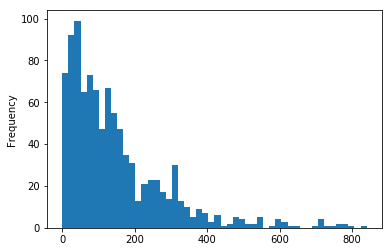

In [14]:
#Take a look at title word count distrubtion

exp1_df['desc_word_count'].plot(bins=50,kind = 'hist')
print('Observe frequency of description word count.  Appears right skewed - average description length is 148 words')

exp1_df['desc_word_count'].describe()

Observe frequency of tags word count. Average description length is 43.5 words


count    989.000000
mean      43.445905
std       24.918742
min        1.000000
25%       22.000000
50%       47.000000
75%       65.000000
max       98.000000
Name: tags_word_count, dtype: float64

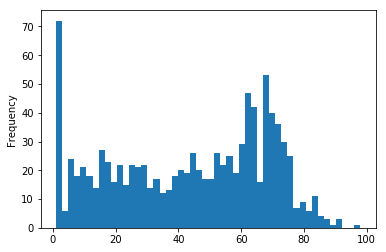

In [15]:
#Take a look at title word count distrubtion

exp1_df['tags_word_count'].plot(bins=50,kind = 'hist')
print('Observe frequency of tags word count. Average description length is 43.5 words')

exp1_df['tags_word_count'].describe()

Interesting to see description word count leading, then tag count, then title count.


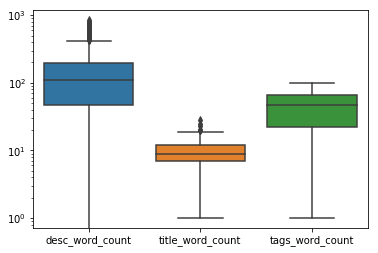

In [16]:
#boxplot shows likeCounts tends to be higher
import seaborn as sns
stats_df = exp1_df[['desc_word_count','title_word_count','tags_word_count']].copy()
ax = sns.boxplot(data=stats_df)
ax.set(yscale="log")
print('Interesting to see description word count leading, then tag count, then title count.')

Very interesting to note black belt videos have higher average for description word count and also there are no outliers!  This tells me that black belt videos have a very strategic approach to description selection.  On the left hand side / lower ranks, we see feeble attempts at adding untargeted / noisy descriptions probably in the hopes of boosting view counts.   


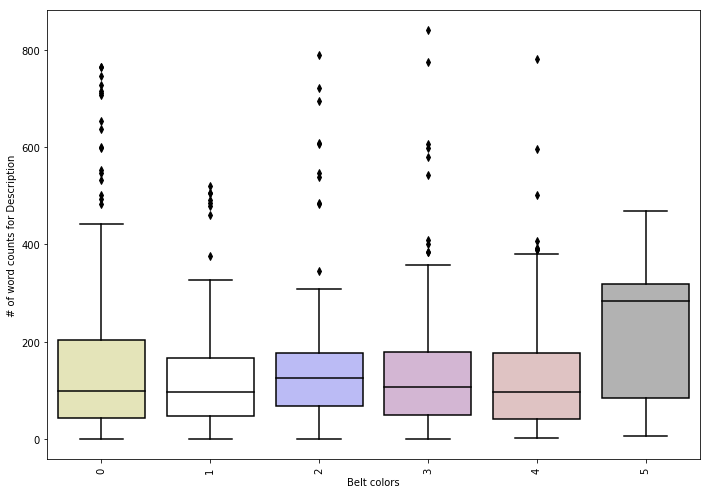

In [17]:
#Visualize count based features by belt color / ranking

import matplotlib.pyplot as plt
dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
my_pal = {0: "y", 1: "w", 2:"b", 3:"purple", 4:"brown", 5:"k"}
g = sns.boxplot(x='target', y='desc_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))



plt.xlabel("Belt colors")
plt.ylabel("# of word counts for Description")
print('Very interesting to note black belt videos have higher average for description word count and also there are no outliers!  This tells me that black belt videos have a very strategic approach to description selection.  On the left hand side / lower ranks, we see feeble attempts at adding untargeted / noisy descriptions probably in the hopes of boosting view counts.   ')

Nothing interesting to note on title word count.


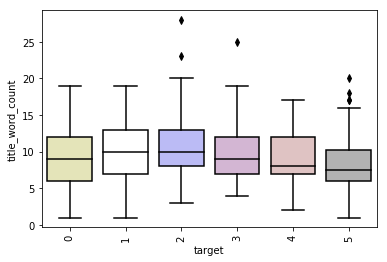

In [18]:
g = sns.boxplot(x='target', y='title_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
print('Nothing interesting to note on title word count.')
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))


Slightly higher average for tags word count on black belt videos.


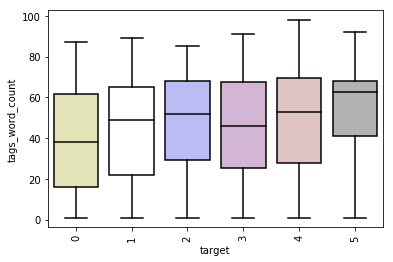

In [19]:
g = sns.boxplot(x='target', y='tags_word_count', data = exp1_df, palette=my_pal)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
print('Slightly higher average for tags word count on black belt videos.')
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

In [20]:
%store word_df
%store exp1_df



Stored 'word_df' (DataFrame)
Stored 'exp1_df' (DataFrame)
